<a href="https://colab.research.google.com/github/mgwalker71/datasharing/blob/master/Vehiclefraudlogisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [192]:
df = pd.read_csv('/content/Vehicle Fraud Dataset.csv')

In [193]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069420
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455570
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374340


In [194]:
len(df.index) # number of rows 


11565

In [195]:
df.shape[1] # disply number of columns

34

In [196]:
df.isnull().sum() # check for missing data

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

No strong correlations amongst predictor variables was seen

<AxesSubplot:>

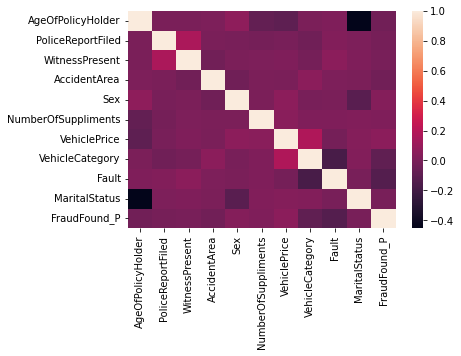

In [205]:
sns.heatmap(df1.corr()) 

We will need to encode the categorical variables using label encoder

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df.select_dtypes('O').columns # select columns with categorical datatype

df[cols]= df[cols].apply(le.fit_transform) # encode the variables

Predictor variables selected based on our initial EDA

In [199]:
df1 = df[['AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AccidentArea','Sex','NumberOfSuppliments','VehiclePrice','VehicleCategory','Fault','MaritalStatus','FraudFound_P']] 

In [200]:
df1.tail()

,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AccidentArea,Sex,NumberOfSuppliments,VehiclePrice,VehicleCategory,Fault,MaritalStatus,FraudFound_P
11560,5,1,0,1,1,0,0,1,0,1,0
11561,7,0,0,1,1,0,1,0,1,2,0
11562,4,0,0,1,1,3,0,0,0,1,1
11563,4,0,0,1,0,2,0,0,1,1,0
11564,3,0,0,1,1,0,0,0,0,2,1


In [201]:
X = df1.drop("FraudFound_P",axis = 1)
y = df1["FraudFound_P"]

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, shuffle=True) # 
print('Number of training instances:', len(X_train))
print('Number of test instances:', len(y_test))

Number of training instances: 8673
Number of test instances: 2892


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
acc_LOG = metrics.accuracy_score(y_test, y_pred_log)

In [204]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
print("Logistic Regression Accuracy:", acc_LOG)
print()
from sklearn import metrics
confusion_matrix(y_test,y_pred_log)


Logistic Regression Accuracy: 0.9412171507607192



array([[2722,    0],
       [ 170,    0]])